<a href="https://colab.research.google.com/github/febrinata23/training_ds/blob/main/Module_4_1_Cluster_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cluster Analysis in Python**

Step untuk melakukan k-means clustering

- Import data & cleaning data
- Exploratory Data Analysis (EDA), termasuk yang scatter plot
- Tentukan jumlah clusternya (silhouette analysis)
- Buat clusternya sesuai hasil step sebelumnya
- Interpret + recomendation

# **Preparation**

## Import library

In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler, RobustScaler

## Load dataset

In [ ]:
# Load the dataset
url = "https://drive.google.com/file/d/1KnoPICg-B6SnA5Ws4JIY1vKxz-4AUOVW/view?usp=sharing"
output = 'telecom_usage.csv'
gdown.download(url, output, quiet=False, fuzzy=True)
df_usage = pd.read_csv('/content/telecom_usage.csv')

Downloading...
From: https://drive.google.com/uc?id=1KnoPICg-B6SnA5Ws4JIY1vKxz-4AUOVW
To: /content/telecom_usage.csv
100%|██████████| 47.0M/47.0M [00:00<00:00, 64.8MB/s]


In [ ]:
df_usage.head(3)

,Customer_ID,upsell_xsell,churn,lifetime_value,avg_arpu_3m,acct_age,billing_cycle,nbr_contracts_ltd,credit_class,sales_channel,...,call_center,issue_level1,issue_level2,call_category_1,call_category_2,resolution,network_mention,service_mention,price_mention,verbatims
0,1860815,0.0,0.0,5931.5,51.775434,46.176471,7.064706,4.8,prime,Retail,...,Moravia - IRU,Cancellation,Cannot Send or Receive Data,Process & Efficiency,Cost of Service,Cancelled Registration,0.0,0.0,0.0,Expensive and sales team are
1,1860848,1.0,0.0,3454.2,70.889160,43.000000,3.000000,3.0,near prime,Retail,...,Arnold Call Center,Equipment,Contacts,Friendly & Courteous,NaN,Directed to manufacturer,0.0,0.0,0.0,10
2,1860944,0.0,0.0,22528.6,58.245550,20.000000,1.000000,2.0,near prime,Retail,...,Monterrey Call Center,Account,Transfer of Billing Responsibility,Helpfulness,Product Range & Availability,Resolved: Shared process ToBR online,0.0,0.0,0.0,The first person man I spoke with was not he...


## Cleaning

let's check for df_usage value

In [ ]:
# cek salah satu row, show isi tiap kolom
for col_name, col_value in df_usage.iloc[9].items():
    print(f"{col_name}: {col_value}")

Customer_ID: 1861237
upsell_xsell: 0.0
churn: 0.0
lifetime_value: 19818.5
avg_arpu_3m: 51.77543388235289
acct_age: 46.1764705882353
billing_cycle: 7.064705882352941
nbr_contracts_ltd: 4.8
credit_class: prime
sales_channel: Retail
rfm_score: 323.0
Est_HH_Income: 63200.0
cs_med_home_value: 1.86
cs_pct_home_owner: 0.73
cs_ttl_pop: 36065.0
cs_hispanic: 32.64
cs_caucasian: 55.14
cs_afr_amer: 7.91
cs_other: 4.32
cs_ttl_urban: 99.04
cs_ttl_rural: 0.96
cs_ttl_male: 48.32
cs_ttl_female: 51.68
cs_ttl_hhlds: 13076.0
cs_ttl_mdage: 34.3
forecast_region: 70.0
product_plan_desc: Lotta Minutes Classic FT
mb_inclplan: 750.0
ever_days_over_plan: 41.0
ever_times_over_plan: 5.0
handset_age_grp: < 24 Months
handset: Apple
lifestage: ON-CONTRACT
rp_pooled_ind: Y
data_device_age: 982.1540436405882
equip_age: 5.0
mfg_apple: 0.0
mfg_samsung: 1.0
mfg_htc: 0.0
mfg_motorola: 0.0
mfg_lg: 0.0
mfg_nokia: 0.0
delinq_indicator: 0.0
times_delinq: 0.0
count_of_suspensions_6m: 0.2764705882352941
avg_days_susp: 0.0
calls_

In [ ]:
# ambil kolom di df_usage yang tipenya adalah number (int maupun float)
df_usage_number_cols = df_usage.select_dtypes(include='number').copy()
df_usage_number_cols.columns

Index(['Customer_ID', 'upsell_xsell', 'churn', 'lifetime_value', 'avg_arpu_3m',
       'acct_age', 'billing_cycle', 'nbr_contracts_ltd', 'rfm_score',
       'Est_HH_Income', 'cs_med_home_value', 'cs_pct_home_owner', 'cs_ttl_pop',
       'cs_hispanic', 'cs_caucasian', 'cs_afr_amer', 'cs_other',
       'cs_ttl_urban', 'cs_ttl_rural', 'cs_ttl_male', 'cs_ttl_female',
       'cs_ttl_hhlds', 'cs_ttl_mdage', 'forecast_region', 'mb_inclplan',
       'ever_days_over_plan', 'ever_times_over_plan', 'data_device_age',
       'equip_age', 'mfg_apple', 'mfg_samsung', 'mfg_htc', 'mfg_motorola',
       'mfg_lg', 'mfg_nokia', 'delinq_indicator', 'times_delinq',
       'count_of_suspensions_6m', 'avg_days_susp', 'calls_total',
       'calls_in_pk', 'calls_in_offpk', 'calls_out_offpk', 'calls_out_pk',
       'mou_total_pct_MOM', 'mou_onnet_pct_MOM', 'mou_roam_pct_MOM',
       'mou_onnet_6m_normal', 'mou_roam_6m_normal', 'voice_tot_bill_mou_curr',
       'tot_voice_chrgs_curr', 'tot_drpd_pr1', 'bill_data_

there are 90 columns with 'number' type. let's choose column that are:
* no null
* 'meaningful' to be clustered

For the sake of learning, let's use easy data first
* Customer_ID --> nomor identitas customer
* lifetime_value --> Customer's value.
* acct_age --> Number of months that the account has been active.
* calls_total --> Current number of calls.
* bill_data_usg_tot --> Total Billed Data Usage


In [ ]:
df_usage_cols_feat = ['Customer_ID', 'lifetime_value', 'acct_age', 'calls_total', 'bill_data_usg_tot']
df_usage[df_usage_cols_feat].head(5)

,Customer_ID,lifetime_value,acct_age,calls_total,bill_data_usg_tot
0,1860815,5931.5,46.176471,1008.62,50.0
1,1860848,3454.2,43.000000,509.42,39.0
2,1860944,22528.6,20.000000,1340.91,50.0
3,1860992,3371.9,25.000000,418.88,43.0
4,1860997,1182.2,55.000000,337.46,51.0


In [ ]:
df_usage_cluster = df_usage[df_usage_cols_feat].set_index(['Customer_ID']) # set Customer_ID sebagai index utk dataframe yang akan digunakan di proses clustering
df_usage_cluster.head(5)

,lifetime_value,acct_age,calls_total,bill_data_usg_tot
Customer_ID,,,,
1860815,5931.5,46.176471,1008.62,50.0
1860848,3454.2,43.000000,509.42,39.0
1860944,22528.6,20.000000,1340.91,50.0
1860992,3371.9,25.000000,418.88,43.0
1860997,1182.2,55.000000,337.46,51.0


In [ ]:
# make sure kolom tersebut tidak ada yang null
df_usage_cluster.isna().sum()

lifetime_value       0
acct_age             0
calls_total          0
bill_data_usg_tot    0
dtype: int64

In [ ]:
# make sure tidak ada baris yang duplikat
df_usage_cluster[df_usage_cluster.duplicated()]

,lifetime_value,acct_age,calls_total,bill_data_usg_tot
Customer_ID,,,,


In [ ]:
cols = df_usage_cluster.columns

## Outlier

#### Boxplot Data Before Outlier Removal

In [ ]:
df_usage_cluster.

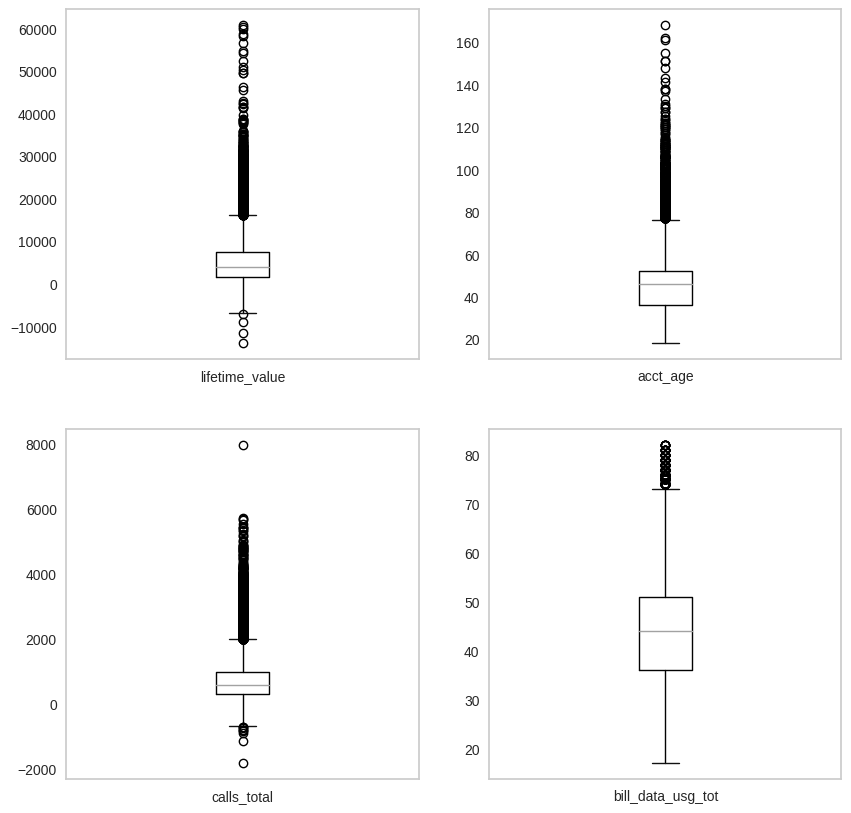

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
for i,el in enumerate(cols):
    a = df_usage_cluster.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

Di semua kolom terdapat outlier. Kita exclude outlier :
* lifetime_value < 0 dan calls_total < 0 --> unlogical
* luar batas atas lifetime value dan calls_total
* bill_data_usg_tot > 70 dan acct_age > 80 --> tidak diexclude krn masih 'make sense'
* lifetime_value dan calls_total bisa ditentukan batas atas outliernya. Disini diset lifetime_value > 14000 dan calls_total > 1750 sebagai outlier

In [ ]:
ltd_val = df_usage_cluster['lifetime_value']<0
calls_tot = df_usage_cluster['calls_total']<0
ltd_val_up = df_usage_cluster['lifetime_value']>14000
calls_tot_up = df_usage_cluster['calls_total']>1750

In [ ]:
df_usage_cluster.shape

(56557, 4)

before removal outlier, total data = 56557

In [ ]:
df_usage_cluster_no_outlier = df_usage_cluster[ ~ltd_val & ~calls_tot & ~ltd_val_up & ~calls_tot_up ]
df_usage_cluster_no_outlier.shape

(47581, 4)

after removal outlier, total data = 47581

In [ ]:
56557 - 47581

8976

In [ ]:
8976/56557*100

15.87071450041551

15% data removed --> acceptable or not?

#### Boxplot Data After Outlier Removal

In [ ]:
df_usage_cluster['lifetime_value'].max()
df_usage_cluster[df_usage_cluster<=upper_quartile+1.5*iqr].max()

60740.2

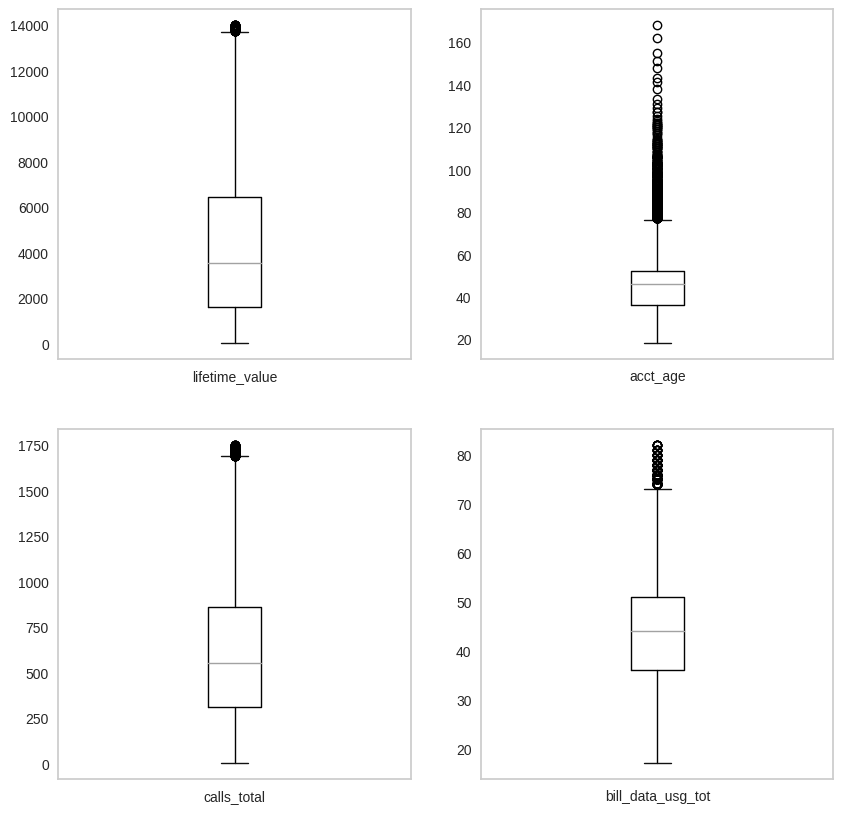

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
for i,el in enumerate(cols):
    a = df_usage_cluster_no_outlier.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
df_usage_cluster_no_outlier.describe()

,lifetime_value,acct_age,calls_total,bill_data_usg_tot
count,47581.000000,47581.000000,47581.000000,47581.000000
mean,4327.911960,45.162195,612.436578,44.668754
std,3276.903563,12.933193,385.850649,11.086676
min,0.000000,18.000000,0.000000,17.000000
25%,1594.100000,36.000000,307.890000,36.000000
50%,3521.933333,46.176471,549.480000,44.000000
75%,6442.900000,52.000000,860.270000,51.000000
max,13996.400000,168.000000,1749.980000,82.000000


## EDA

* Rata-rata customer's lifetime value 4,237
* Rata-rata account telah aktif selama 45 bulan, terlama 168 bulan (14 tahun)
* Rata-rata billing data sebesar 44
* Rata-rata melakukan panggilan (calls) sebanyak 612x, dengan maksimum 1749x

# Clustering

K-Means tends to works best when the numbers on the same number scale. In this data, we can see that the scale is very different -- therefore, we need to do scaling to this dataset.

There are four types of feature scaling:

- MinMaxScaler
- StandardScaler
- RobustScaler
- PowerTransformer

The goal of all these types of scaler is to allow each variable to be compared on a common scale.  

With data measured in different "units" or on different scales (as here with different means and variances) this is an important data processing step if the results are to be meaningful or not dominated by the variables that have large variances

On this exercises, we will use **RobustScaler**.


#### Scaling

In [ ]:
df_cluster_scaled = df_usage_cluster_no_outlier.copy()

scaler = RobustScaler()
df_cluster_scaled[cols] = scaler.fit_transform(df_cluster_scaled[cols])
df_cluster_scaled.head()

,lifetime_value,acct_age,calls_total,bill_data_usg_tot
Customer_ID,,,,
1860815,0.496941,0.000000,0.831203,0.400000
1860848,-0.013969,-0.198529,-0.072523,-0.333333
1860992,-0.030942,-1.323529,-0.236431,-0.066667
1860997,-0.482539,0.551471,-0.383830,0.466667
1861022,0.079642,0.238971,0.735436,0.200000


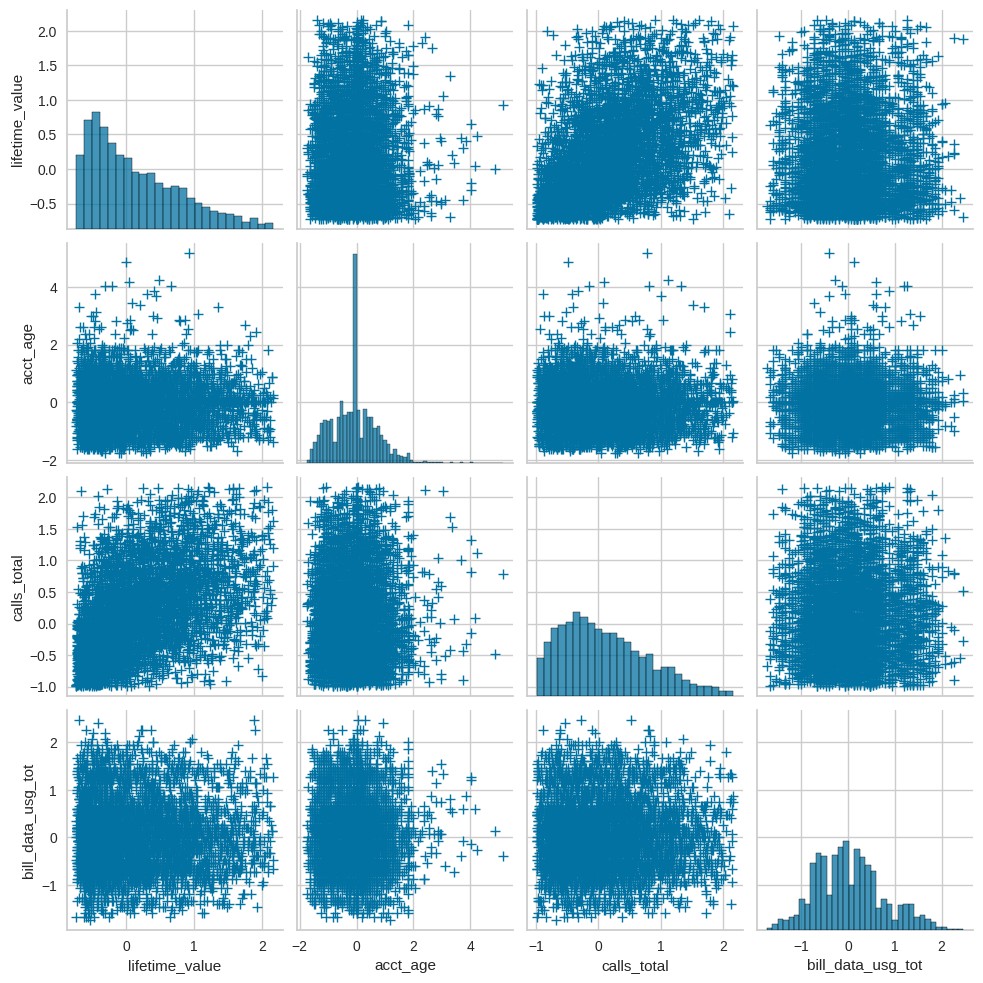

In [ ]:
sns.pairplot(
    df_cluster_scaled.sample(round(0.1*df_cluster_scaled.shape[0])),
    plot_kws=dict(marker="+", linewidth=1),
)

## K-Means Initial Approach

For k-means clustering, we need to determine `n_clusters`, number of cluster we want to create.

Let's suppose we want to create 3 cluster of customer. Then n_clusters = 3

In [ ]:
#panggil model
cluster_model = KMeans(n_clusters = 3, random_state = 1000, n_init=10)
cluster_model

KMeans(n_clusters=3, n_init=10, random_state=1000)

In [ ]:
# model nya belajar ke data nya (fitting)
cluster_model.fit(df_cluster_scaled)

KMeans(n_clusters=3, n_init=10, random_state=1000)

In [ ]:
cluster_model.labels_

array([1, 2, 2, ..., 0, 2, 2], dtype=int32)

In [ ]:
df_cluster_scaled['cluster'] = cluster_model.labels_
df_cluster_scaled

,lifetime_value,acct_age,calls_total,bill_data_usg_tot,cluster
Customer_ID,,,,,
1860815,0.496941,0.000000,0.831203,0.400000,1
1860848,-0.013969,-0.198529,-0.072523,-0.333333,2
1860992,-0.030942,-1.323529,-0.236431,-0.066667,2
1860997,-0.482539,0.551471,-0.383830,0.466667,0
1861022,0.079642,0.238971,0.735436,0.200000,1
...,...,...,...,...,...
3999369,-0.242747,-0.823529,-0.118759,-0.666667,2
3999397,-0.488911,0.738971,0.781835,0.333333,0
3999465,0.031114,1.426471,-0.072160,-0.533333,0


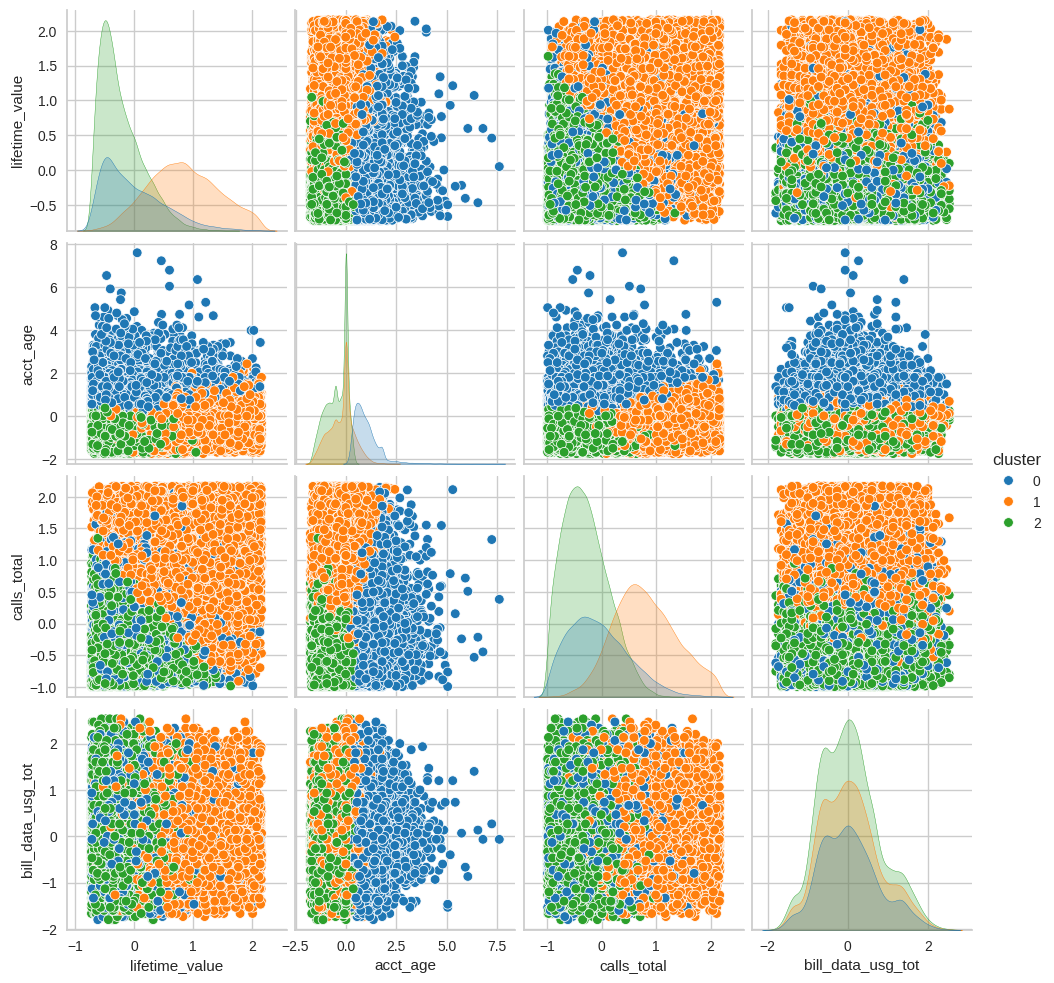

In [ ]:
sns.pairplot(df_cluster_scaled, hue='cluster', palette='tab10')

## Hierarical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import random

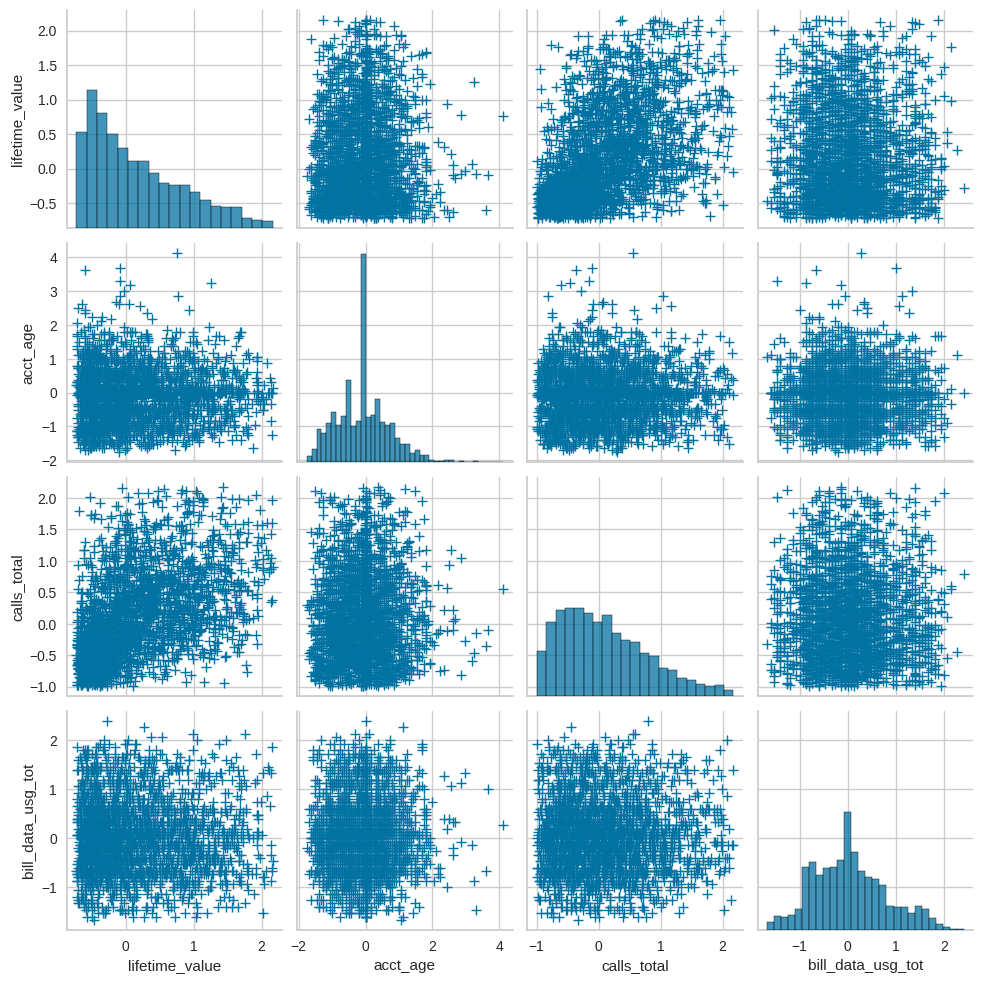

In [ ]:
df_cluster_scaled_half = df_usage_cluster_no_outlier.copy()

scaler = RobustScaler()
df_cluster_scaled_half[cols] = scaler.fit_transform(df_cluster_scaled_half[cols])


# Randomly select 50% of the data (using sample method)
half_df = df_cluster_scaled_half.sample(frac=0.5)

# Alternatively, randomly select 50% of the data (using boolean indexing)
random_indices = random.sample(range(len(df_cluster_scaled_half)), int(len(df_cluster_scaled_half) * 0.5))
half_df = df_cluster_scaled_half.iloc[random_indices]

sns.pairplot(
    half_df.sample(round(0.1*half_df.shape[0])),
    plot_kws=dict(marker="+", linewidth=1),
)

In [ ]:
hierarical_clustering = AgglomerativeClustering(n_clusters=3)


## **hierarichal**

In [ ]:
hierarical_clustering = AgglomerativeClustering(n_clusters=3).fit(half_df)
hierarical_clustering

AgglomerativeClustering(n_clusters=3)

In [ ]:
hierarical_clustering.labels_

array([0, 2, 2, ..., 2, 0, 0])

In [ ]:
half_df['cluster_hierarical'] = hierarical_clustering.labels_
half_df

<ipython-input-42-e10f9f1be164>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  half_df['cluster_hierarical'] = hierarical_clustering.labels_


,lifetime_value,acct_age,calls_total,bill_data_usg_tot,cluster_hierarical
Customer_ID,,,,,
1917610,-0.418090,-1.511029,-0.794218,1.066667,0
13033,-0.697437,1.551471,-0.688976,0.000000,2
2752928,-0.638742,-0.073529,-0.415710,0.200000,2
691154,0.960994,0.613971,0.311959,0.400000,1
2861209,0.349275,0.113971,-0.136627,-0.533333,2
...,...,...,...,...,...
888740,-0.006380,-0.136029,0.367501,0.933333,1
3013590,0.768967,1.176471,0.725243,-0.733333,1
1324733,0.113794,0.113971,0.194522,-1.600000,2


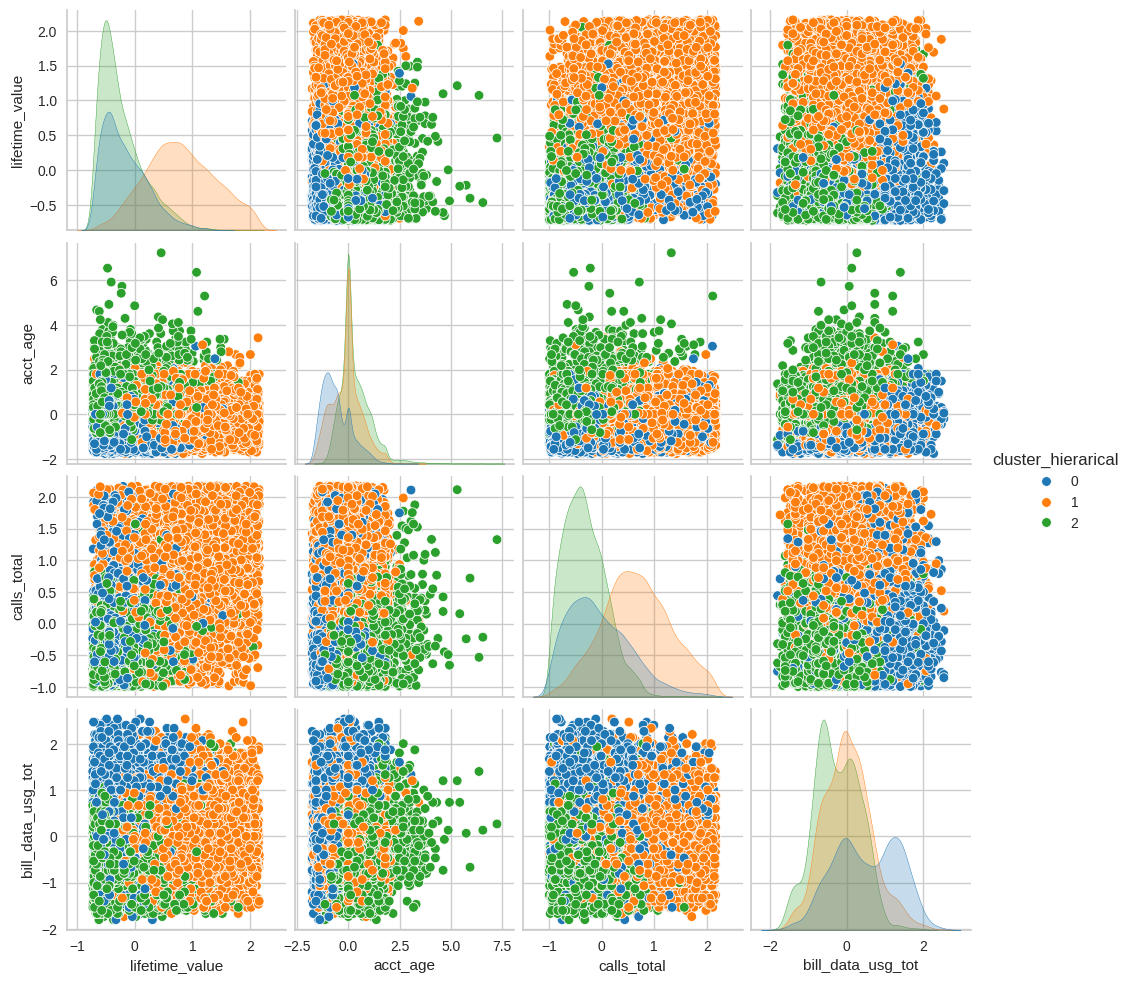

In [ ]:
sns.pairplot(half_df, hue='cluster_hierarical', palette='tab10')

# But: Is it the best cluster size?

Remember that we magically comes up with n_clusters = 3. Is this the best clustering we can have?

To check that, we need to try different `n_clusters` and confirm using Silhouette Analysis

### Silhouette Method
- Depends on silhouette score, ranged between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.
- This is particularly useful for determining cluster imbalance, or for selecting a value for  by comparing multiple visualizers.

In [ ]:
# Silhouette score plot
K = range(2,9)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 1000, n_init = 10)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = True, ax = ax[q-1][mod])
  sil.fit(df_cluster_scaled)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

It looks like n_cluster = 3 or 5 is quite fit for clustering.

### Final cluster

In [ ]:
# Create the final cluster model
# Initialize KMeans for 5 clusters
cluster_model = KMeans(n_clusters = 3, random_state = 1000, n_init=10)
cluster_model.fit(df_cluster_scaled)
df_cluster_scaled['cluster'] = cluster_model.labels_
df_cluster_scaled.head(5)

Let's put assigned cluster to original data (before scaled)

In [ ]:
df_usage_cluster_no_outlier.head(5) ## original data before scaled

In [ ]:
df_cluster_scaled.head(5) ## scaled data and clustered

In [ ]:
df_final = df_usage_cluster_no_outlier.copy()
df_final['cluster'] = cluster_model.labels_ ## assign cluster to original not-scaled data
df_final.head(5)

# Interpret the cluster

In [ ]:
df_final.groupby('cluster').mean()

In [ ]:
df_final.groupby('cluster').median()

In [ ]:
df_final.groupby('cluster').min()

In [ ]:
df_final.groupby('cluster').max()

## Interpretation

Cluster 0 (saturated but loyal user, data and call in moderate use):
* lifetime value rata-rata 2230 (terendah diantara cluster),
* telah melakukan panggilan sekitar rata-rata 423x (terendah diantara cluster),
* billing data-nya sekitar 40
* customer dengan masa aktif terlama terdapat di cluster ini (168 bulan = 14 tahun)

Cluster 1 (loyal conventional user that calls more than use data):
* lifetime value rata-rata 7623 (tertinggi diantara cluster),
* telah melakukan panggilan sekitar rata-rata 998x (tertinggi diantara cluster),
* billing data-nya sekitar 37 (paling rendah dibanding cluster lain)

Cluster 2 (millenial user that use data more than calls):
* lifetime value rata-rata 4493,
* telah melakukan panggilan sekitar rata-rata 623x,
* billing data-nya sekitar 55 (tertinggi diantara cluster)

## Recommendation

Cluster 0 (saturated but loyal user, data and call in moderate use):
* create loyalty program, special price for call

Cluster 1 (loyal conventional user that calls more than use data):
* special price for data usage

Cluster 2 (millenial user that use data more than calls):
* special bundling for call and data